<a href="https://colab.research.google.com/github/big-blue22/20250718/blob/main/%E7%AC%AC%E4%BA%8C%E5%9B%9E%E3%80%80%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90%E3%81%A8%E5%9B%BA%E6%9C%89%E5%80%A4_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第1回講義で使った9科目の成績データの主成分分析を行います。主成分分析の話は、[1つ目の教材動画](https://youtu.be/mMmTHoZKWTI?si=U0ttinFR4DtsmWwR)を見て概要を把握してください。主成分分析には固有値の計算が必要ですが、スプレッドシートでは固有値が計算できないので、今回はコンピュータ言語Pythonを使ってデータ解析を行います。主成分分析の計算になぜ固有値の計算が必要なのかが気になる場合は、[こちら](https://www.youtube.com/watch?v=R5oOco7BG2E)の動画を見てください。
まずは、第1回講義で使った9科目の成績データを関数pd.read_csvを使って変数seisekiに代入します。また、9科目の順番を忘れないために変数kamoku_nameに対応する科目名を入れておきます。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
seiseki=pd.read_csv('https://statistics.co.jp/reference/statistical_data/seiseki.csv')
kamoku_name=['kokugo', 'shakai', 'sugaku', 'rika', 'ongaku','bijutu','taiiku','gika','eigo']

入力した成績データを表示して確認してみましょう。166人のデータが０番から１６５番のインデックスが付けられて変数seisekiに収められていることが分かります。

In [2]:
seiseki

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44
...,...,...,...,...,...,...,...,...,...
161,82,78,80,88,80,69,83,78,90
162,0,8,2,9,5,18,42,2,1
163,45,26,29,24,31,57,68,40,27
164,73,31,43,32,59,64,82,48,56


まず、基本統計量として9科目それぞれの平均を計算してみましょう。関数np.sumで変数seisekiの各列の和を計算した後に、学生数166で割ると科目の平均点が得られます。計算した平均は変数avに入力されています。

In [3]:
av=np.sum(seiseki)/166
print("9科目の平均は、\n",av.round(2))

9科目の平均は、
 kokugo    52.33
shakai    39.60
sugaku    45.61
rika      49.89
ongaku    42.33
bijutu    62.46
taiiku    57.74
gika      47.31
eigo      39.08
dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


次に、標準偏差を計算しましょう。まず成績から平均を引いて偏差（各自の成績が平均からどれくらい離れているか）seiseki-avを計算します。次に各科目毎で偏差の2乗和を計算してその平方根を計算します。Pythonでは、関数np.linalg.normで計算できます。この値を$\sqrt{166}$ で割ると各科目の標準偏差が得られます。

In [4]:
sig=np.linalg.norm(seiseki-av,axis=0)/np.sqrt(166)
print("科目名=",kamoku_name)
print("9科目の標準偏差=",sig.round(2))

科目名= ['kokugo', 'shakai', 'sugaku', 'rika', 'ongaku', 'bijutu', 'taiiku', 'gika', 'eigo']
9科目の標準偏差= [21.77 21.39 24.16 21.34 22.83 17.14 26.5  22.45 29.42]


次に成績データの標準化を行います。美術と英語の平均点で20点以上の差があります。また、身長と体重などの異なる種類のデータを扱う場合もあり、それぞれのデータのバラツキを揃えるために主成分分析を行う前には、データを標準化する必要があります。標準化することで各科目に対応する値は平均が０で標準偏差が１になるように変換されます。具体的には166行9列で表された成績を表す行列から各科目の平均を引いた偏差を標準偏差で割る(seiseki-av)/sigを計算して標準化されたデータ（166行9列の行列）を変数Sに代入します。得られたSを確認しましょう。

In [5]:
S=(seiseki-av)/sig
S

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,-1.025785,0.158828,0.222884,0.614446,0.774066,0.206704,-0.782744,-0.147306,-0.648722
1,-0.612372,-0.869612,0.140113,0.286478,1.212167,0.556835,-0.065702,0.698964,-0.784692
2,-1.071720,-0.448887,-0.935912,0.333331,1.168357,0.790255,-0.933700,0.298100,-1.124616
3,1.959977,2.215709,1.298908,2.347991,1.518838,1.140386,0.764556,2.168802,1.628768
4,0.811607,1.467753,1.340294,0.801856,1.299787,1.140386,-0.443093,0.698964,0.167095
...,...,...,...,...,...,...,...,...,...
161,1.362825,1.794984,1.423065,1.785760,1.650268,0.381769,0.953251,1.367072,1.730746
162,-2.403829,-1.477327,-1.805009,-1.915592,-1.635489,-2.594343,-0.594049,-2.018008,-1.294578
163,-0.336763,-0.635876,-0.687599,-1.212804,-0.496426,-0.318493,0.387166,-0.325468,-0.410776
164,0.949411,-0.402139,-0.108201,-0.837983,0.730256,0.089993,0.915512,0.030856,0.575004


いよいよ固有値の計算になります。標準化されたデータSを166行9列の行列の$k$行目で$i$列目の値は、$k$番目の学生の$i$番目の科目（$i=1$なら国語、$i=2$なら社会 ... ）の得点を表し、$s_{k,i}$と表すことにします。ここで、行列の積$S^t\cdot S$を計算します。$S^t$は行列$S$の行と列を入れ替えた9行166列の行列で転置行列(Transposed Matrix)と呼ばれます。9行166列の行列と166行9列の行列の積$S^t\cdot S$をデータ数166で割った行列を変数Dに代入します。変数Dは、9行9列の行列なります。行列の積の計算から行列Dの$(i,j)$-成分（行列Dの$i$行目で$j$列目の値）$D_{ij}$は、
$$
D_{ij}=\frac{\sum^{166}_{k=1} s_{k,i} s_{k,j}}{166}
$$
となります。この値は$i=j$の時は、$i$番目の科目の分散を表し、$i\neq j$のとき、$i$番目の科目と$j$番目の科目の共分散を表します。
この行列Dを正規化されたデータSの共分散行列と呼びます。
Pythonでは、転置行列を関数np.transposeで求め、行列の積はnp.dotで計算できます。更に、行列Dの固有値k$(k_1, k_2, \ldots ,k_9)$と固有ベクトルV$(PC_1, PC_2, \ldots ,PC_9)$をPythonの関数np.linalg.eigで求めます。9行9列の行列では9個の固有値$k_i$が得られ、対応する9個の固有ベクトル$PC_i$が得られます。ここで、固有値と固有ベクトルに関する定義や求め方などの一般的な説明は、[こちら](https://youtu.be/_TgBFx0jwRQ)を見てください。
ここで得られた固有値は、対応するベクトルを主成分ベクトルとして成績データを変換した値の分散と一致します。特に固有値が最大の固有ベクトルが第1主成分、2番目に大きい固有値をもつ固有ベクトルが第2主成分を表すベクトルになります。
得られた固有値＝分散$k_i$を使って主成分分析の寄与率(Explained Variance ratio)$\lambda_i$を次の計算式で計算します。
$$ \lambda_i =\frac{k_i}{\sum^9_{i=1} k_i}$$

In [6]:
D=np.dot(np.transpose(S),S)/166
print("行列D=\n",D.round(1))
k, V = np.linalg.eig(D)
print("分散=固有値k=",k.round(2))
kiyo_r=k*100/sum(k)
print("寄与率(%)=",kiyo_r.round(2))


行列D=
 [[1.  0.8 0.7 0.7 0.7 0.7 0.4 0.7 0.8]
 [0.8 1.  0.8 0.8 0.7 0.6 0.2 0.7 0.8]
 [0.7 0.8 1.  0.8 0.8 0.6 0.2 0.6 0.8]
 [0.7 0.8 0.8 1.  0.8 0.6 0.1 0.7 0.8]
 [0.7 0.7 0.8 0.8 1.  0.7 0.3 0.6 0.7]
 [0.7 0.6 0.6 0.6 0.7 1.  0.4 0.5 0.6]
 [0.4 0.2 0.2 0.1 0.3 0.4 1.  0.1 0.3]
 [0.7 0.7 0.6 0.7 0.6 0.5 0.1 1.  0.6]
 [0.8 0.8 0.8 0.8 0.7 0.6 0.3 0.6 1. ]]
分散=固有値k= [6.01 1.1  0.49 0.41 0.3  0.12 0.22 0.18 0.17]
寄与率(%)= [66.74 12.2   5.45  4.52  3.34  1.35  2.46  2.03  1.9 ]


では、第1主成分と第2主成分のベクトルを変数PCに入力して、正規化された成績データに右からPCを掛けて2次元データSpを計算します。学生各自の2次元データで散布図で赤い点として表現します。また、9科目それぞれの散布図上の位置（例えばtaiikuは体育だけ高得点でそれ以外は0点の学生の位置）は青い点で表現します。

第1および第2主成分
 [[-0.36  0.15]
 [-0.37 -0.15]
 [-0.36 -0.18]
 [-0.37 -0.25]
 [-0.35  0.01]
 [-0.31  0.31]
 [-0.14  0.86]
 [-0.32 -0.15]
 [-0.36 -0.05]]
科目名= ['kokugo', 'shakai', 'sugaku', 'rika', 'ongaku', 'bijutu', 'taiiku', 'gika', 'eigo']


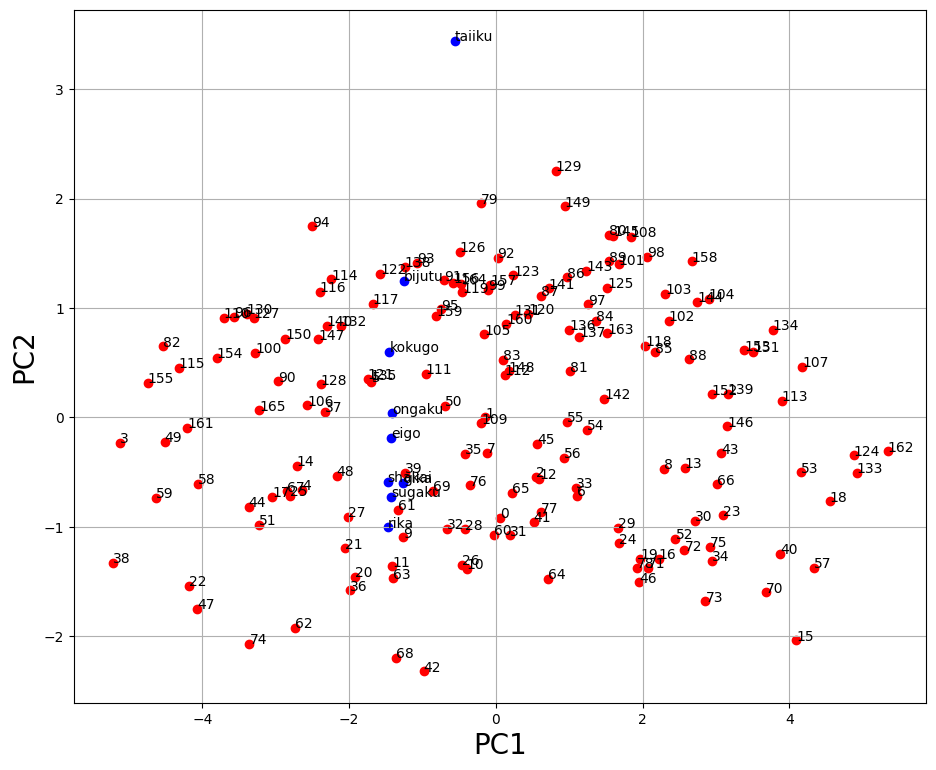

In [7]:
PC=V[:,[0,1]]
Sp=np.dot(S,PC)
print("第1および第2主成分\n",PC.round(2))
# 教科を見やすくするため、ベクトルを2倍にする。
PC=PC*2
print("科目名=",kamoku_name)
plt.figure(figsize=(11, 9))
plt.xlabel("PC1", fontsize=20) # x軸ラベル
plt.ylabel("PC2", fontsize=20) # y軸ラベル
for i, txt in enumerate(np.arange(166)):
    plt.annotate(txt, (Sp[i,0], Sp[i,1]))
for i in range(9) :
    plt.annotate(kamoku_name[i], (PC[i,0]*2,PC[i,1]*2))
plt.grid(True) # 目盛線の表示
plt.scatter(PC[:,0]*2,PC[:,1]*2,c='blue')
plt.scatter(Sp[:,0],Sp[:,1],c='red')
plt.show()

第2主成分と第3主成分で可視化したものです。技術が得意だと上方向に、体育が得意だと右方向に引っ張られます。美術は右上に、数学・英語が得意だと下方向に引っ張られることになります。

第2および第3主成分
 [[ 0.15  0.07]
 [-0.15 -0.06]
 [-0.18 -0.4 ]
 [-0.25  0.01]
 [ 0.01 -0.2 ]
 [ 0.31  0.26]
 [ 0.86 -0.08]
 [-0.15  0.78]
 [-0.05 -0.32]]
科目名= ['kokugo', 'shakai', 'sugaku', 'rika', 'ongaku', 'bijutu', 'taiiku', 'gika', 'eigo']


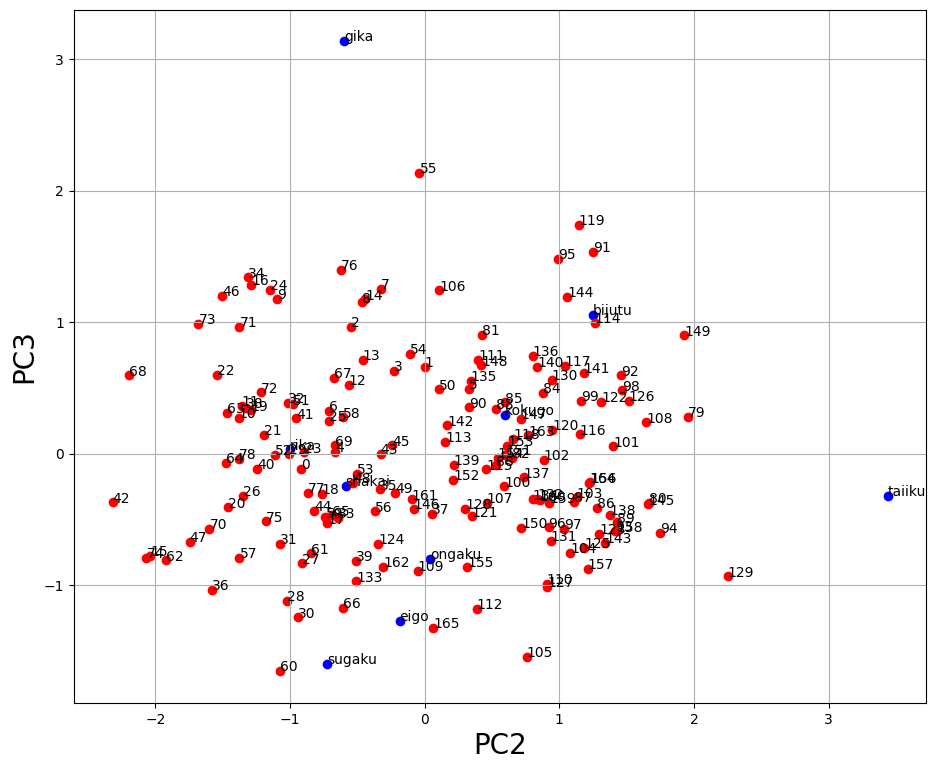

In [8]:
PC=V[:,[1,2]]
Sp=np.dot(S,PC)
print("第2および第3主成分\n",PC.round(2))
# 教科を見やすくするため、ベクトルを2倍にする。
PC=PC*2
print("科目名=",kamoku_name)
plt.figure(figsize=(11, 9))
plt.xlabel("PC2", fontsize=20) # x軸ラベル
plt.ylabel("PC3", fontsize=20) # y軸ラベル
for i, txt in enumerate(np.arange(166)):
    plt.annotate(txt, (Sp[i,0], Sp[i,1]))
for i in range(9) :
    plt.annotate(kamoku_name[i], (PC[i,0]*2,PC[i,1]*2))
plt.grid(True) # 目盛線の表示
plt.scatter(PC[:,0]*2,PC[:,1]*2,c='blue')
plt.scatter(Sp[:,0],Sp[:,1],c='red')
plt.show()

In [9]:
kamoku5_name=['kokugo', 'shakai', 'sugaku', 'rika','eigo']
seiseki5=seiseki[kamoku5_name]
seiseki5

,kokugo,shakai,sugaku,rika,eigo
0,30,43,51,63,20
1,39,21,49,56,16
2,29,30,23,57,6
3,95,87,77,100,87
4,70,71,78,67,44
...,...,...,...,...,...
161,82,78,80,88,90
162,0,8,2,9,1
163,45,26,29,24,27
164,73,31,43,32,56


In [10]:
# 平均点の計算と表示
av5 = np.sum(seiseki5) / 166
print("5科目の平均は、\n", av5.round(2))

5科目の平均は、
 kokugo    52.33
shakai    39.60
sugaku    45.61
rika      49.89
eigo      39.08
dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [11]:
# 5科目の標準偏差を計算
sig5 = np.linalg.norm(seiseki5 - av5, axis=0) / np.sqrt(166)

# 結果を表示
print("科目名=", kamoku5_name)
print("5科目の標準偏差=", sig5.round(2))

科目名= ['kokugo', 'shakai', 'sugaku', 'rika', 'eigo']
5科目の標準偏差= [21.77 21.39 24.16 21.34 29.42]


In [14]:
# 5科目のデータを標準化
S5 = (seiseki5 - av5) / sig5

print("標準化されたデータ（最初の5行）:")
print(S5)

標準化されたデータ（最初の5行）:
       kokugo    shakai    sugaku      rika      eigo
0   -1.025785  0.158828  0.222884  0.614446 -0.648722
1   -0.612372 -0.869612  0.140113  0.286478 -0.784692
2   -1.071720 -0.448887 -0.935912  0.333331 -1.124616
3    1.959977  2.215709  1.298908  2.347991  1.628768
4    0.811607  1.467753  1.340294  0.801856  0.167095
..        ...       ...       ...       ...       ...
161  1.362825  1.794984  1.423065  1.785760  1.730746
162 -2.403829 -1.477327 -1.805009 -1.915592 -1.294578
163 -0.336763 -0.635876 -0.687599 -1.212804 -0.410776
164  0.949411 -0.402139 -0.108201 -0.837983  0.575004
165  0.352259  2.122215  1.795535  1.410939  1.560784

[166 rows x 5 columns]


In [15]:
# S5が既にあると仮定して、ここからが今回の処理です

# 1. 分散共分散行列を計算
# 標準化データS5の転置行列と、S5自身の内積を計算します。
D5 = np.dot(np.transpose(S5), S5) / 166
print("行列D=\n", D5.round(1))

# 2. 固有値と固有ベクトルを計算
# D5から、主成分の分散の大きさを表す「固有値 k5」と、
# 主成分の方向を表す「固有ベクトル V5」を求めます。
k5, V5 = np.linalg.eig(D5)
print("分散=固有値k=", k5.round(2))

# 3. 寄与率を計算
# 全体のばらつき（分散）のうち、各主成分がどれくらいの割合を
# 説明しているかを「寄与率」として計算します。
kiyo_r5 = k5 * 100 / sum(k5)
print("寄与率(%)=", kiyo_r5.round(2))

行列D=
 [[1.  0.8 0.7 0.7 0.8]
 [0.8 1.  0.8 0.8 0.8]
 [0.7 0.8 1.  0.8 0.8]
 [0.7 0.8 0.8 1.  0.8]
 [0.8 0.8 0.8 0.8 1. ]]
分散=固有値k= [4.1  0.32 0.14 0.19 0.25]
寄与率(%)= [82.04  6.32  2.78  3.79  5.07]


第1および第2主成分の方向=
 [[-0.43 -0.77]
 [-0.46 -0.01]
 [-0.45  0.42]
 [-0.45  0.46]
 [-0.45 -0.12]]


/tmp/ipython-input-1574112998.py:31: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects.png')
/tmp/ipython-input-1574112998.py:31: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects.png')
/tmp/ipython-input-1574112998.py:31: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects.png')
/tmp/ipython-input-1574112998.py:31: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects.png')
/tmp/ipython-input-1574112998.py:31: UserWarning: Glyph 24466 (\N{CJK UNIFIED IDEOGRAPH-5F92}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects.png')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from fo

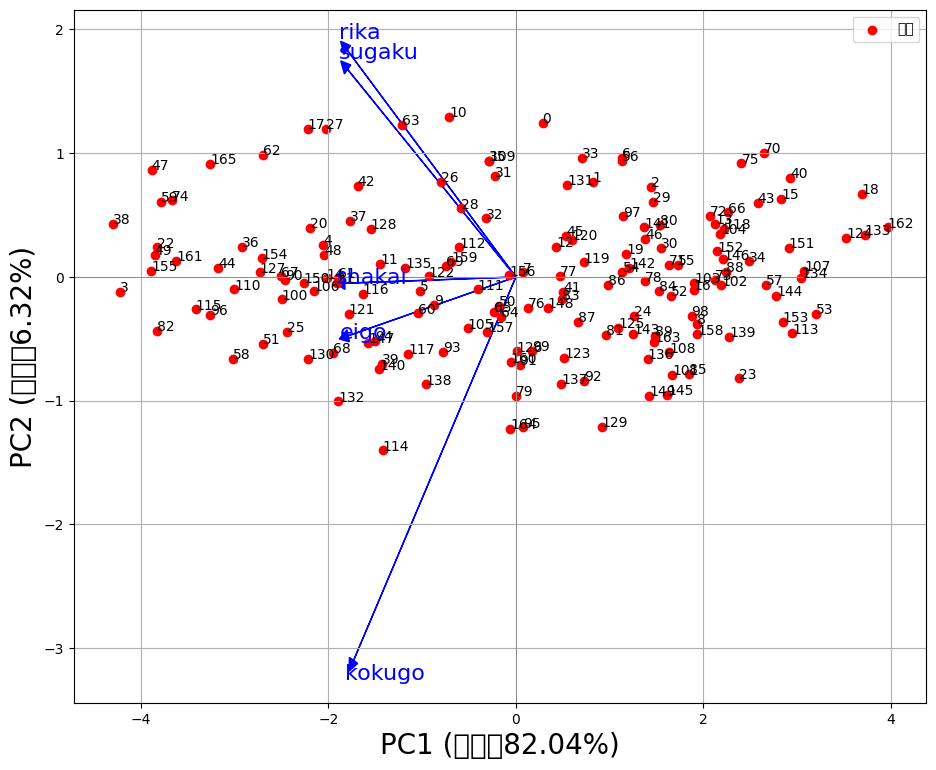

In [16]:
# --- ここからが今回ご依頼の処理です ---

# 第1、第2主成分の固有ベクトルを取り出す
PC5 = V5[:,[0,1]]
# 主成分得点を計算する
Sp5 = np.dot(S5, PC5)

print("第1および第2主成分の方向=\n", PC5.round(2))

# グラフの作成
plt.figure(figsize=(11, 9))
plt.xlabel("PC1 (寄与率82.04%)", fontsize=20) # x軸ラベル
plt.ylabel("PC2 (寄与率6.32%)", fontsize=20) # y軸ラベル

# 生徒166人分の主成分得点をプロット
for i, txt in enumerate(np.arange(166)):
    plt.annotate(txt, (Sp5[i,0], Sp5[i,1]))

# 科目の主成分負荷量をプロット（見やすくするためにベクトルを4倍にする）
for i in range(5):
    plt.arrow(0, 0, PC5[i,0]*4, PC5[i,1]*4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(PC5[i,0]*4.2, PC5[i,1]*4.2, kamoku5_name[i], color='blue', fontsize=16)

plt.grid(True) # 目盛線の表示
plt.scatter(Sp5[:,0], Sp5[:,1], c='red', label='生徒') # 生徒のスコア
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()

# グラフを画像ファイルとして保存
plt.savefig('pca_biplot_5subjects.png')

第2および第3主成分の方向=
 [[-0.77  0.12]
 [-0.01 -0.59]
 [ 0.42 -0.41]
 [ 0.46  0.63]
 [-0.12  0.26]]


/tmp/ipython-input-1501813134.py:30: UserWarning: Glyph 23492 (\N{CJK UNIFIED IDEOGRAPH-5BC4}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects_pc2_pc3.png')
/tmp/ipython-input-1501813134.py:30: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects_pc2_pc3.png')
/tmp/ipython-input-1501813134.py:30: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects_pc2_pc3.png')
/tmp/ipython-input-1501813134.py:30: UserWarning: Glyph 29983 (\N{CJK UNIFIED IDEOGRAPH-751F}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects_pc2_pc3.png')
/tmp/ipython-input-1501813134.py:30: UserWarning: Glyph 24466 (\N{CJK UNIFIED IDEOGRAPH-5F92}) missing from font(s) DejaVu Sans.
  plt.savefig('pca_biplot_5subjects_pc2_pc3.png')


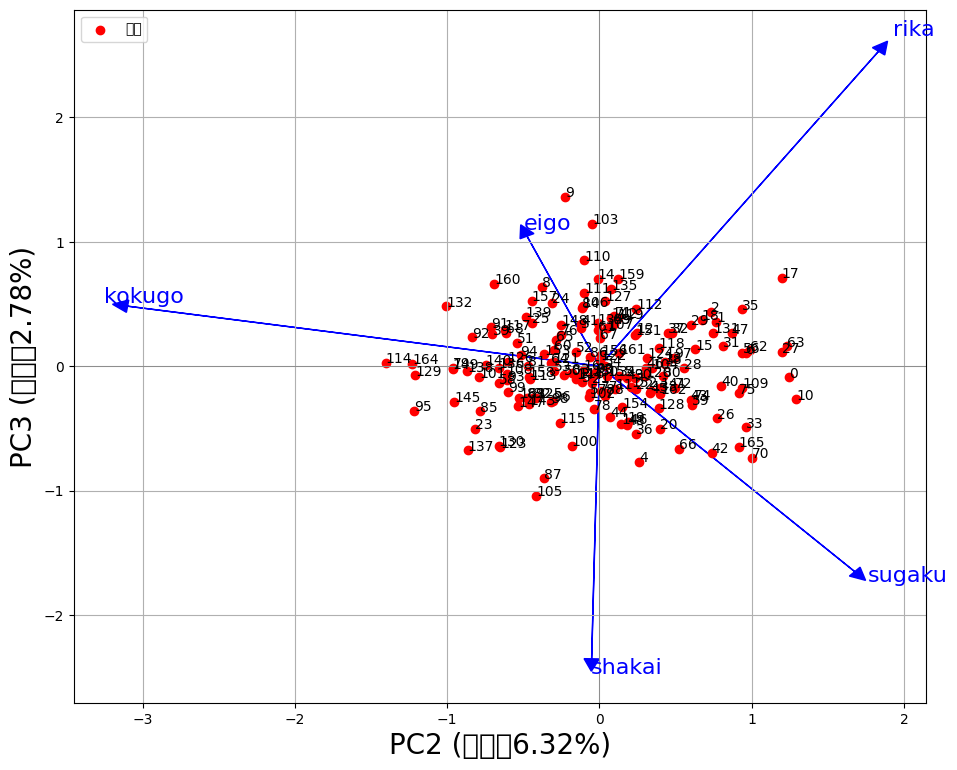

In [17]:
# 第2、第3主成分の固有ベクトルを取り出す
PC5_23 = V5[:,[1,2]]
# 主成分得点を計算する
Sp5_23 = np.dot(S5, PC5_23)

print("第2および第3主成分の方向=\n", PC5_23.round(2))

# グラフの作成
plt.figure(figsize=(11, 9))
# 軸の寄与率はユーザーが提供した値を使用
plt.xlabel("PC2 (寄与率6.32%)", fontsize=20) # x軸ラベル
plt.ylabel("PC3 (寄与率2.78%)", fontsize=20) # y軸ラベル

# 生徒166人分の主成分得点をプロット
for i, txt in enumerate(np.arange(166)):
    plt.annotate(txt, (Sp5_23[i,0], Sp5_23[i,1]))

# 科目の主成分負荷量をプロット（見やすくするためにベクトルを4倍にする）
for i in range(5):
    plt.arrow(0, 0, PC5_23[i,0]*4, PC5_23[i,1]*4, head_width=0.1, head_length=0.1, fc='blue', ec='blue')
    plt.text(PC5_23[i,0]*4.2, PC5_23[i,1]*4.2, kamoku5_name[i], color='blue', fontsize=16)

plt.grid(True)
plt.scatter(Sp5_23[:,0], Sp5_23[:,1], c='red', label='生徒')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.legend()

# グラフを画像ファイルとして保存
plt.savefig('pca_biplot_5subjects_pc2_pc3.png')
